In [1]:
library(dplyr)
library(caret)
library(mice)
library(ModelMetrics)
library(randomForest)
library(forecast)
library(Rcpp) 
library(RSNNS)
library(MASS)
library(grid)
library(neuralnet)
library(FNN)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ModelMetrics’

The following objects are masked from ‘package:caret’:

    confusionMatrix, precision, recall, sensitivity, specificity

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘RSNNS’

The following object is masked from ‘package:ModelMetrics’:

    confusionMatrix

The following objects are masked from ‘package:caret’:

    confusionMatrix, train


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘neuralnet’

The follow

In [2]:
setwd("~/Documents")
x <- read.csv("./10-100.csv", row.names=1)

In [17]:
head(x,2)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name,target
0,MLB Cincinnati Reds T Shirt Size XL,3,808,4786,10,1,No description yet,"[12, 68, 79]","[3852, 8823, 6896, 208, 84, 6, 155]",-0.36946359
1,Razer BlackWidow Chroma Keyboard,3,86,3557,52,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,"[29, 2627, 10, 7, 39, 17, 1, 207, 51, 19, 1113, 63, 11, 2, 57, 35, 11, 2, 3181, 26, 757, 1, 379, 710, 2, 1272, 26, 7767, 1276, 2, 10760, 56749, 1670, 14, 49, 985]","[10760, 25565, 16369, 2627]",0.04400456


In [11]:
set.seed(1)
train<-sample(1:nrow(x),round(nrow(x)*7/10))
co_to_drop <- c(1,5,7:9)
x.train <- x[train,-co_to_drop]
x.test <- x[-train,-co_to_drop]

In [25]:
print(dim(x.train))
print(dim(x.test))
head(x.train,2)

[1] 1037774       5
[1] 444761      5


,item_condition_id,category_name,brand_name,shipping,target
393625,2,1139,4786,0,-0.2709364
551686,2,795,1035,0,-0.3060490


# Linear Regression

In [13]:
x.lm <- lm(target~.,data=x.train)

In [20]:
summary(x.lm)


Call:
lm(formula = target ~ ., data = x.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90870 -0.13206 -0.02471  0.10850  1.28870 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.195e-01  7.644e-04 -156.32   <2e-16 ***
item_condition_id -1.669e-02  2.132e-04  -78.29   <2e-16 ***
category_name      3.636e-05  4.069e-07   89.37   <2e-16 ***
brand_name        -1.552e-05  1.264e-07 -122.80   <2e-16 ***
shipping          -8.693e-02  3.838e-04 -226.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1892 on 1037769 degrees of freedom
Multiple R-squared:  0.07738,	Adjusted R-squared:  0.07738 
F-statistic: 2.176e+04 on 4 and 1037769 DF,  p-value: < 2.2e-16


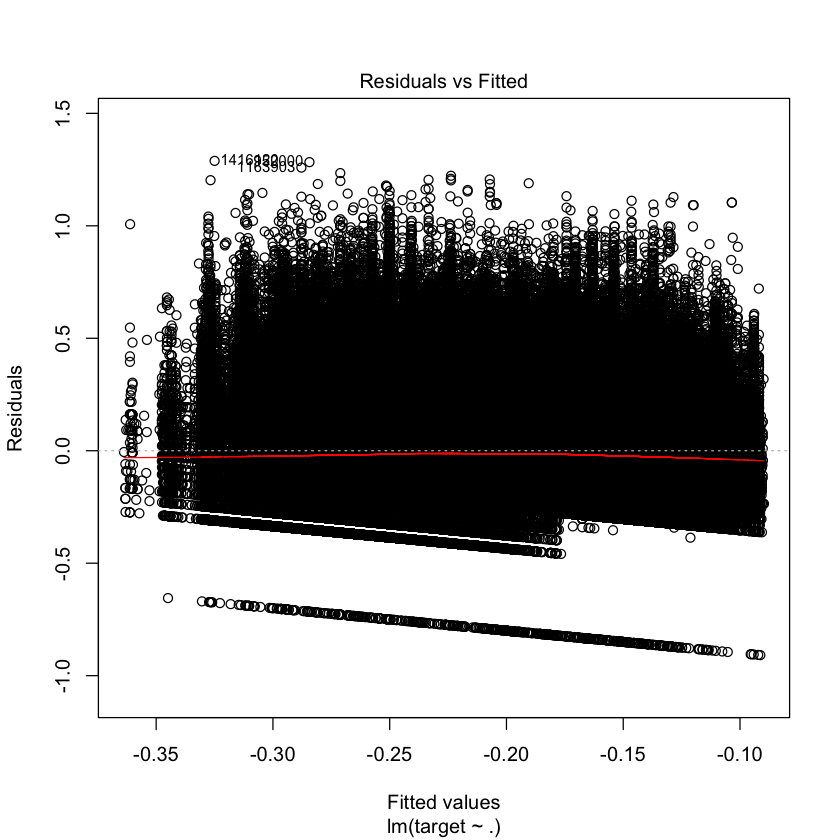

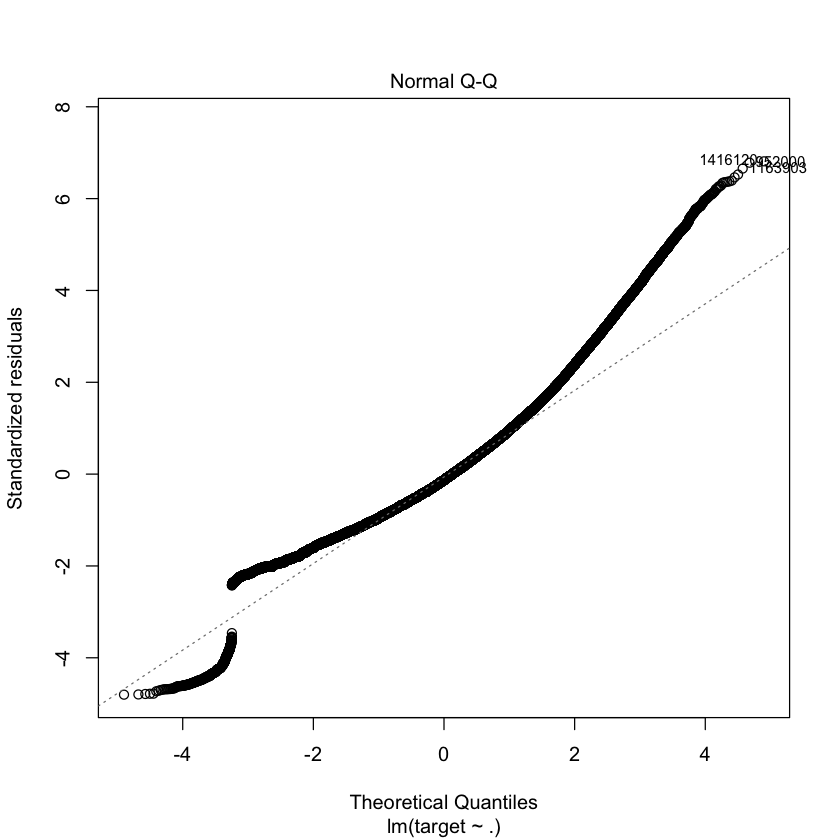

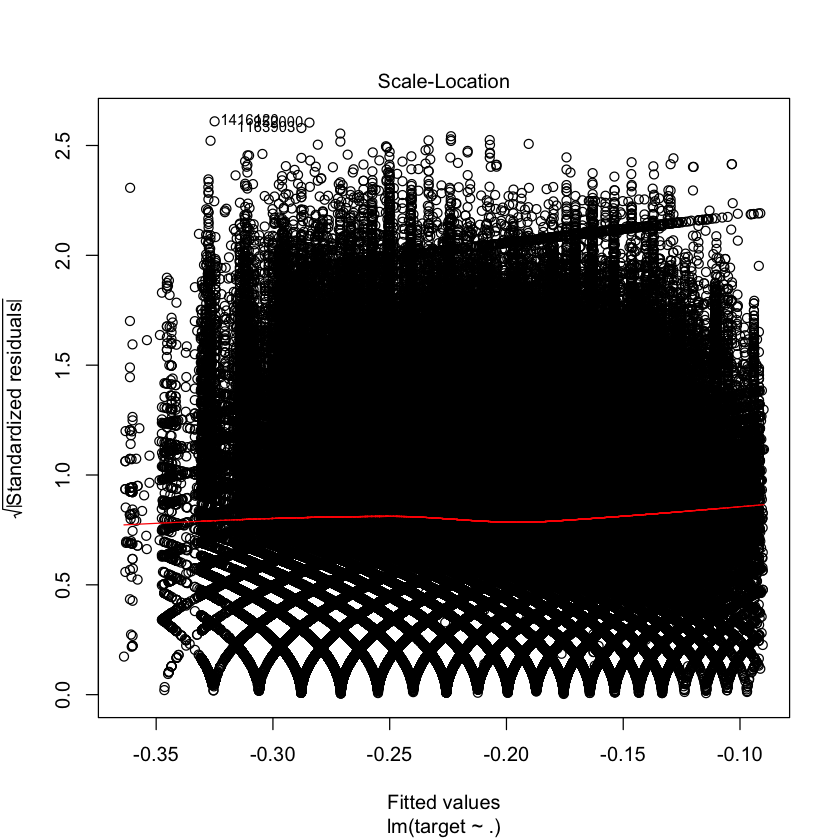

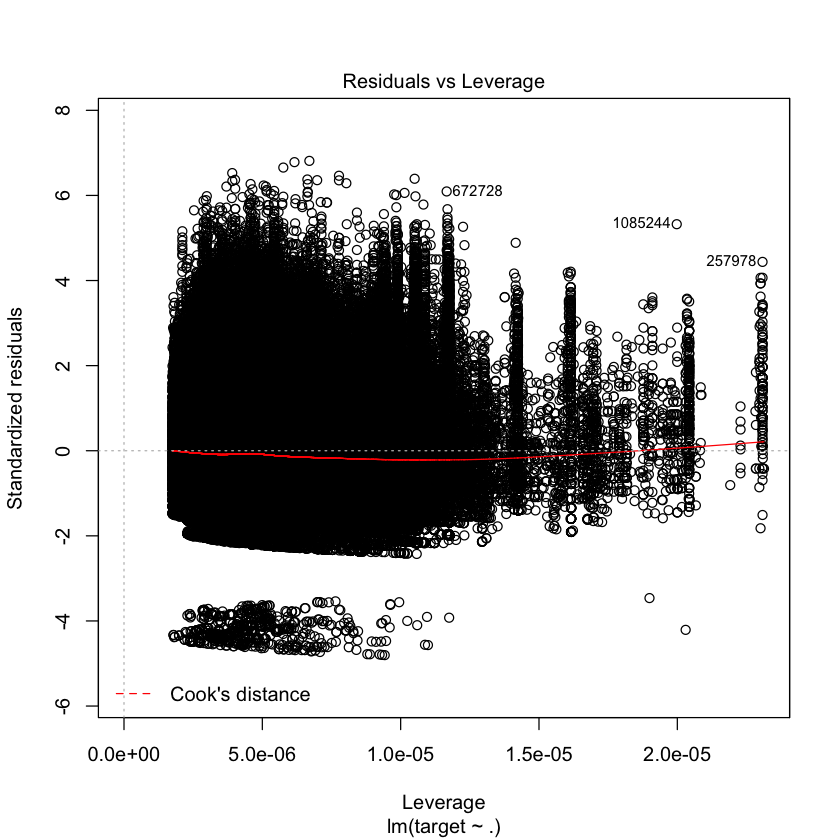

In [19]:
plot(x.lm)

In [21]:
pred.lm <- predict(x.lm,x.test)

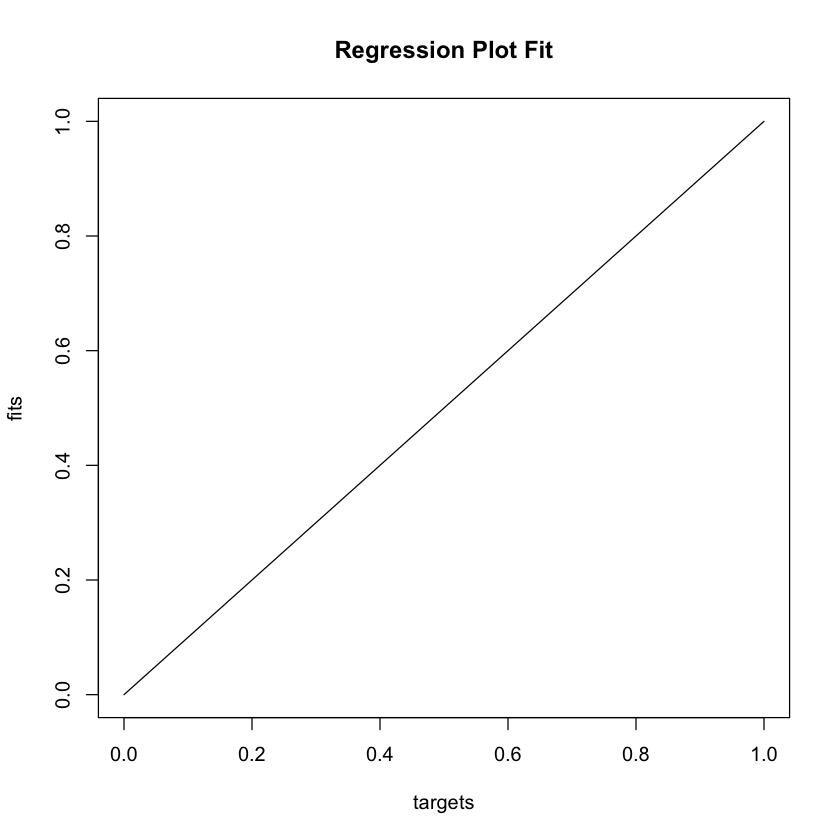

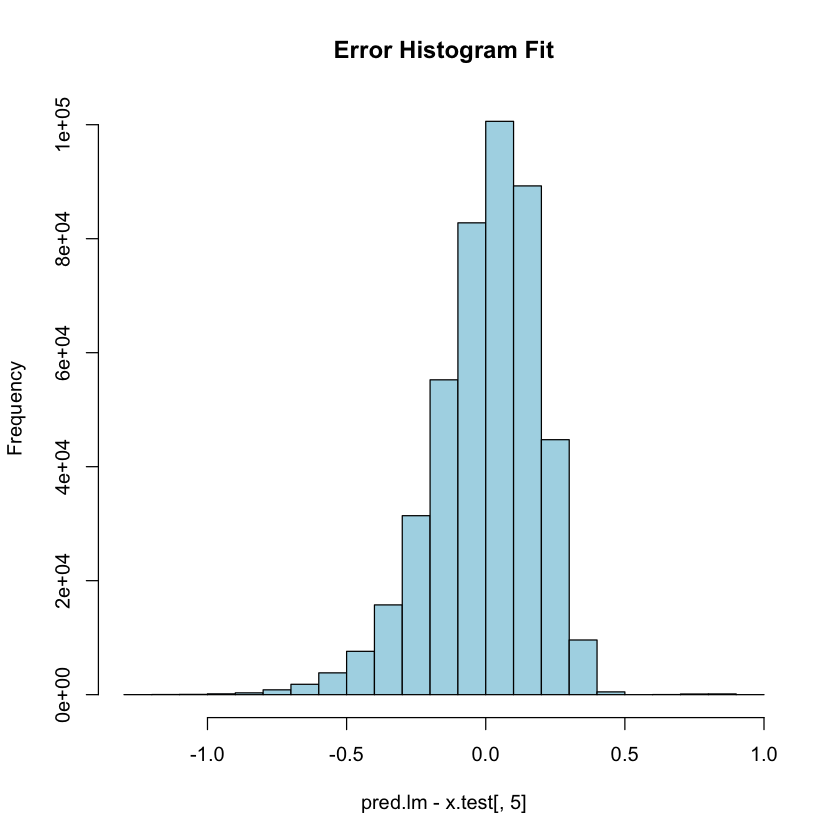

In [27]:
plotRegressionError(x.test[,5], pred.lm, main="Regression Plot Fit")
hist(pred.lm-x.test[,5], col="lightblue", main="Error Histogram Fit")

# Random Forest